## **PROYECTO MÓDULO 3: Optimización de Talento**

### **FASE 2: gestión de nulos**

##### **Porcentaje de nulos:**

In [211]:
#Importar librerías
import pandas as pd
import numpy as np 


In [212]:
#Configuración de la visualización del DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [213]:
# Abrimos el fichero guardado para seguir trabajando

df = pd.read_csv("HR_RAW_v2.csv", index_col = 0)
df.head(3)

,numero_empleado,desvinculado,genero,edad,año_nacimiento,estado_civil,nivel_estudios,campo_estudios,frecuencia_viaje,distancia_domicilio,teletrabajo,tipo_jornada,formaciones_ultimo_año,trabajos_anteriores,años_en_activo,antigüedad_empresa,años_ultimo_ascenso,años_mismo_responsable,departamento,categoria,puesto,horas_extras,evaluacion_desempeño,tarifa_hora,tarifa_diaria,tarifa_mensual,ingreso_mensual,%_incremento_salarial,acceso_acciones_empresa,nivel_compromiso,nivel_satisfaccion_global,nivel_satisfaccion_trabajo,nivel_satisfaccion_relaciones,nivel_satisfaccion_conciliacion
0,162.0,No,male,51,1972,ns/nc,3,ns/nc,non travel,15.55,yes,full time,5,7,NaN,20,15,15,sin asignar,5,research director,No,3.0,51.0,684.0,6462,19537.0,13,0,3,1,3,3,3.0
1,259.0,No,male,52,1971,ns/nc,4,Life Sciences,non travel,2.59,yes,full time,5,0,34.0,33,11,9,sin asignar,5,manager,No,3.0,65.0,699.0,5678,19999.0,14,1,2,3,3,1,3.0
2,319.0,No,male,42,1981,married,2,Technical Degree,travel rarely,10.36,yes,full time,3,1,22.0,22,11,15,research & development,5,manager,No,3.0,58.0,532.0,4933,19232.0,11,0,3,3,4,4,NaN


In [214]:
#Sacamos el % de nulos: 

porc_nulos = ((df.isnull().sum() / df.shape[0]) * 100).round(2)
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
numero_empleado,26.70
años_en_activo,32.59
evaluacion_desempeño,12.08
tarifa_hora,5.20
tarifa_diaria,7.68
ingreso_mensual,52.23
nivel_satisfaccion_conciliacion,6.69


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>%_nulos</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>numero_empleado</th>
      <td>26.70</td>
    </tr>
    <tr>
      <th>estado_civil</th>
      <td>40.33</td>
    </tr>
    <tr>
      <th>campo_estudios</th>
      <td>46.16</td>
    </tr>
    <tr>
      <th>frecuencia_viaje</th>
      <td>47.83</td>
    </tr>
    <tr>
      <th>tipo_jornada</th>
      <td>74.04</td>
    </tr>
    <tr>
      <th>años_en_activo</th>
      <td>32.59</td>
    </tr>
    <tr>
      <th>años_puesto_actual</th>
      <td>97.89</td>
    </tr>
    <tr>
      <th>departamento</th>
      <td>81.29</td>
    </tr>
    <tr>
      <th>rol_y_departamento</th>
      <td>81.29</td>
    </tr>
    <tr>
      <th>horas_extras</th>
      <td>41.88</td>
    </tr>
    <tr>
      <th>evaluacion_desempeño</th>
      <td>12.08</td>
    </tr>
    <tr>
      <th>tarifa_hora</th>
      <td>5.20</td>
    </tr>
    <tr>
      <th>tarifa_diaria</th>
      <td>7.68</td>
    </tr>
    <tr>
      <th>ingreso_mensual</th>
      <td>52.23</td>
    </tr>
    <tr>
      <th>recibe_mismo_salario</th>
      <td>52.23</td>
    </tr>
    <tr>
      <th>nivel_satisfaccion_conciliacion</th>
      <td>6.69</td>
    </tr>
  </tbody>
</table>
</div>

##### **Imputación de nulos:**

###### <u>**COLUMNAS CATEGÓRICAS:**</u>


In [215]:
# COLUMNA frecuencia de viaje: cambiar nulos por 'non-travel'

df['frecuencia_viaje'] = df['frecuencia_viaje'].fillna('non-travel')
df['frecuencia_viaje'].isnull().sum()

0

In [216]:
df['frecuencia_viaje'] =df['frecuencia_viaje'].str.replace('-',' ').str.replace('_',' ')

In [217]:
df['frecuencia_viaje']

0              non travel
1              non travel
2           travel rarely
3           travel rarely
4              non travel
5              non travel
6              non travel
7           travel rarely
8              non travel
9       travel frequently
10             non travel
11          travel rarely
12             non travel
13          travel rarely
14             non travel
15          travel rarely
16          travel rarely
17          travel rarely
18             non travel
19          travel rarely
20             non travel
21             non travel
22             non travel
23             non travel
24          travel rarely
25             non travel
26             non travel
27             non travel
28          travel rarely
29             non travel
30             non travel
31             non travel
32          travel rarely
33             non travel
34          travel rarely
35          travel rarely
36             non travel
37             non travel
38      trav

In [218]:
# COLUMNA tipo jornada: cambiar los nulos de la  por 'full time': 

df['tipo_jornada'] = df['tipo_jornada'].fillna('full time')
df['tipo_jornada'].isnull().sum()


0

In [219]:
df['tipo_jornada']

0       full time
1       full time
2       full time
3       full time
4       full time
5       full time
6       full time
7       full time
8       full time
9       full time
10      full time
11      full time
12      full time
13      full time
14      full time
15      full time
16      full time
17      full time
18      full time
19      full time
20      full time
21      full time
22      full time
23      part time
24      full time
25      part time
26      full time
27      full time
28      full time
29      full time
30      full time
31      full time
32      full time
33      part time
34      full time
35      full time
36      full time
37      full time
38      full time
39      part time
40      part time
41      full time
42      full time
43      part time
44      full time
45      full time
46      full time
47      part time
48      part time
49      part time
50      full time
51      part time
52      full time
53      full time
54      full time
55      pa

In [220]:
# OTRAS COLUMNAS: Gestionamos los nulos de las columnas object

columnas_desconocido = ['estado_civil', 'campo_estudios']
for columna in columnas_desconocido:
    df[columna] = df[columna].fillna("ns/nc")
df[columnas_desconocido].isnull().sum()


estado_civil      0
campo_estudios    0
dtype: int64

In [221]:
# Gestionamos los nulos de las columnas object

df['departamento'] = df['departamento'].fillna("sin asignar")
df['departamento'].isnull().sum()

0

In [222]:
# Vemos los tipos de dato presentes en esta columna object: 
tipos_unicos = set(df["horas_extras"].apply(type))
tipos_unicos

{str}

In [223]:
# Gestionamos los nulos de las columnas object:
# Imputamos con la moda en esta columna categórica que contiene datos tipo float además de str.

moda = df['horas_extras'].mode()[0]
df['horas_extras'] = df['horas_extras'].fillna(moda)
df['horas_extras'].isnull().sum()

0

###### <u>**COLUMNAS NUMÉRICAS:**</u>

In [224]:
#Gestionamos los nulos de las columnas tipo number: 
# Mostramos el % que supone cada dato en cada columna numérica.

columnas_number_con_nulos = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
for col in columnas_number_con_nulos:
    print(col.upper())
    display((df[col].value_counts() / df.shape[0])*100)

NUMERO_EMPLEADO


numero_empleado
482.0     0.123916
530.0     0.123916
507.0     0.123916
517.0     0.123916
522.0     0.123916
523.0     0.123916
525.0     0.123916
526.0     0.123916
544.0     0.123916
501.0     0.123916
725.0     0.123916
724.0     0.123916
722.0     0.123916
721.0     0.123916
717.0     0.123916
710.0     0.123916
502.0     0.123916
495.0     0.123916
747.0     0.123916
440.0     0.123916
734.0     0.123916
733.0     0.123916
728.0     0.123916
423.0     0.123916
424.0     0.123916
433.0     0.123916
447.0     0.123916
1140.0    0.123916
455.0     0.123916
460.0     0.123916
465.0     0.123916
470.0     0.123916
475.0     0.123916
478.0     0.123916
682.0     0.123916
663.0     0.123916
653.0     0.123916
1069.0    0.123916
389.0     0.123916
388.0     0.123916
381.0     0.123916
376.0     0.123916
1044.0    0.123916
1053.0    0.123916
1195.0    0.123916
621.0     0.123916
1185.0    0.123916
1162.0    0.123916
1161.0    0.123916
1160.0    0.123916
1157.0    0.123916
1131.0    0.123

AÑOS_EN_ACTIVO


años_en_activo
10.0    8.921933
8.0     5.328377
6.0     5.204461
9.0     4.275093
5.0     4.089219
7.0     3.469641
4.0     3.345725
1.0     3.283767
12.0    2.106568
3.0     1.982652
14.0    1.858736
13.0    1.858736
11.0    1.796778
15.0    1.734820
16.0    1.734820
20.0    1.734820
18.0    1.672862
21.0    1.425031
17.0    1.363073
2.0     1.301115
22.0    1.115242
19.0    1.053284
24.0    0.867410
23.0    0.805452
28.0    0.805452
26.0    0.495663
0.0     0.495663
29.0    0.371747
36.0    0.371747
25.0    0.371747
33.0    0.371747
37.0    0.309789
27.0    0.309789
31.0    0.247831
30.0    0.185874
32.0    0.185874
35.0    0.185874
40.0    0.185874
34.0    0.123916
38.0    0.061958
Name: count, dtype: float64

EVALUACION_DESEMPEÑO


evaluacion_desempeño
3.0    74.659232
4.0    13.258984
Name: count, dtype: float64

TARIFA_HORA


tarifa_hora
42.0     2.044610
66.0     1.982652
48.0     1.858736
84.0     1.796778
57.0     1.796778
54.0     1.734820
46.0     1.734820
98.0     1.734820
87.0     1.672862
92.0     1.672862
96.0     1.672862
72.0     1.672862
56.0     1.610905
79.0     1.610905
32.0     1.610905
86.0     1.548947
81.0     1.548947
52.0     1.548947
61.0     1.548947
83.0     1.486989
62.0     1.486989
51.0     1.486989
82.0     1.486989
43.0     1.425031
74.0     1.425031
77.0     1.425031
41.0     1.425031
94.0     1.425031
88.0     1.425031
73.0     1.425031
45.0     1.425031
60.0     1.363073
95.0     1.363073
78.0     1.363073
76.0     1.301115
59.0     1.301115
99.0     1.301115
80.0     1.301115
67.0     1.301115
91.0     1.239157
97.0     1.239157
75.0     1.239157
90.0     1.239157
85.0     1.239157
44.0     1.239157
49.0     1.239157
64.0     1.177200
55.0     1.177200
65.0     1.177200
71.0     1.177200
100.0    1.177200
39.0     1.177200
37.0     1.177200
36.0     1.115242
40.0     1.11524

TARIFA_DIARIA


tarifa_diaria
691.0     0.433705
329.0     0.433705
147.0     0.371747
408.0     0.371747
530.0     0.371747
827.0     0.309789
334.0     0.309789
1329.0    0.309789
1082.0    0.309789
1157.0    0.309789
1283.0    0.309789
906.0     0.309789
427.0     0.309789
950.0     0.309789
688.0     0.309789
303.0     0.247831
1003.0    0.247831
465.0     0.247831
715.0     0.247831
921.0     0.247831
1490.0    0.247831
1099.0    0.247831
1092.0    0.247831
977.0     0.247831
1018.0    0.247831
933.0     0.247831
430.0     0.247831
1225.0    0.247831
829.0     0.247831
1469.0    0.247831
575.0     0.247831
793.0     0.247831
895.0     0.247831
217.0     0.247831
805.0     0.247831
589.0     0.247831
654.0     0.247831
1276.0    0.247831
703.0     0.247831
201.0     0.247831
1485.0    0.247831
240.0     0.247831
661.0     0.247831
501.0     0.247831
482.0     0.247831
1229.0    0.247831
1107.0    0.247831
1180.0    0.247831
1495.0    0.185874
238.0     0.185874
142.0     0.185874
1277.0    0.18587

INGRESO_MENSUAL


ingreso_mensual
6347.0     0.247831
5304.0     0.247831
2657.0     0.185874
2258.0     0.185874
5405.0     0.123916
8224.0     0.123916
2610.0     0.123916
5731.0     0.123916
2539.0     0.123916
2376.0     0.123916
11713.0    0.123916
2216.0     0.123916
19189.0    0.123916
3452.0     0.123916
2070.0     0.123916
8793.0     0.123916
2587.0     0.123916
4960.0     0.123916
11159.0    0.123916
5396.0     0.123916
2782.0     0.123916
4197.0     0.123916
9434.0     0.123916
5337.0     0.123916
2741.0     0.123916
2791.0     0.123916
5828.0     0.123916
2909.0     0.123916
2033.0     0.123916
2821.0     0.123916
7756.0     0.123916
2042.0     0.123916
6632.0     0.123916
7587.0     0.123916
4335.0     0.123916
5980.0     0.123916
4244.0     0.123916
5228.0     0.123916
2700.0     0.123916
2380.0     0.123916
2404.0     0.123916
2377.0     0.123916
2366.0     0.123916
2329.0     0.123916
4294.0     0.123916
6725.0     0.123916
10325.0    0.123916
4447.0     0.123916
10845.0    0.123916
3420

NIVEL_SATISFACCION_CONCILIACION


nivel_satisfaccion_conciliacion
3.0    56.567534
2.0    22.242875
4.0     9.603470
1.0     4.894672
Name: count, dtype: float64

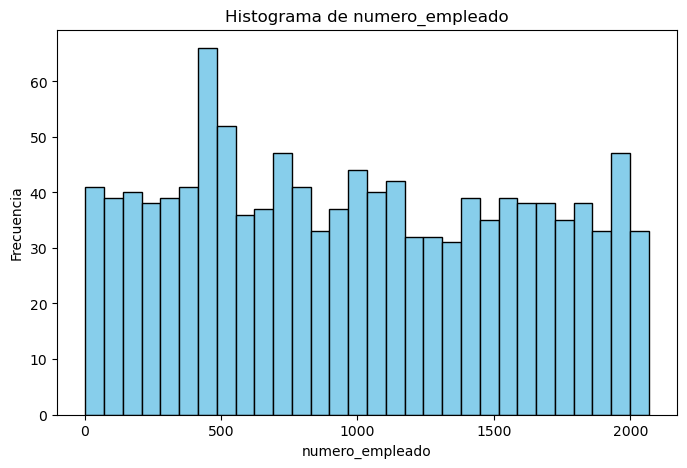

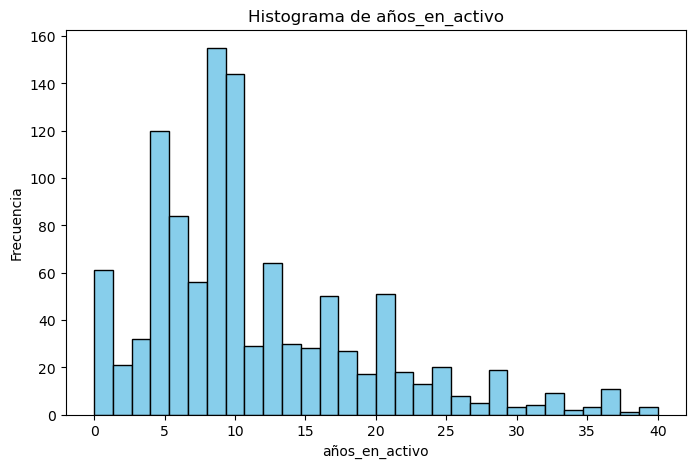

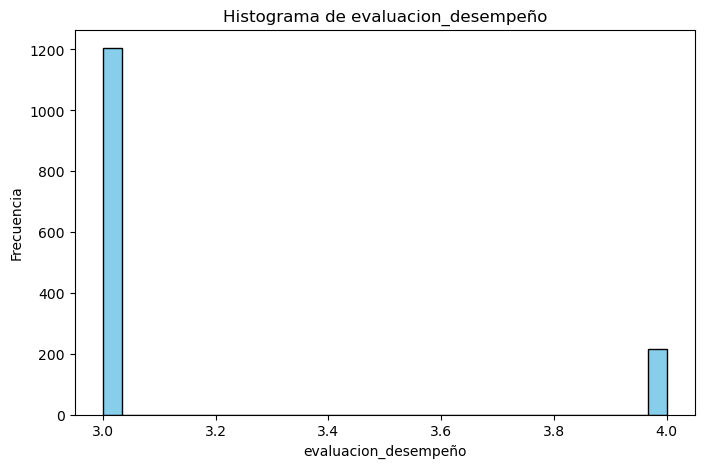

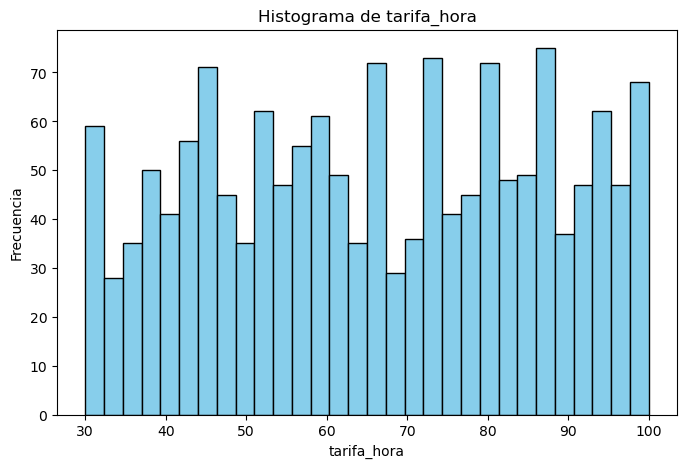

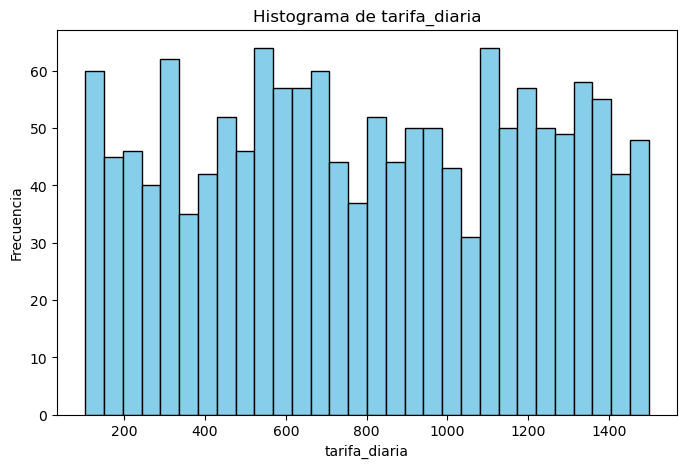

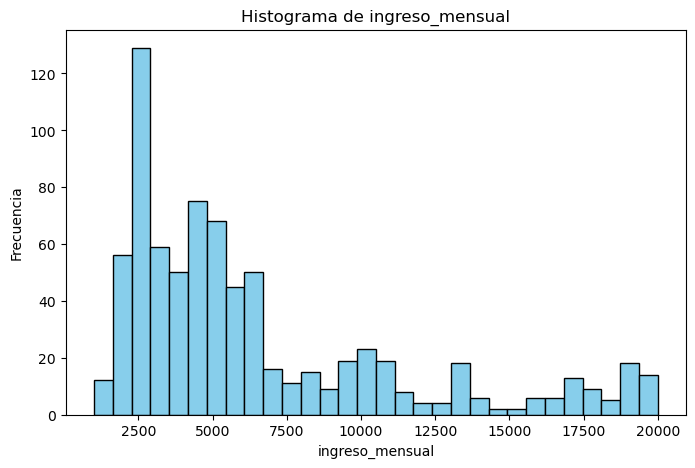

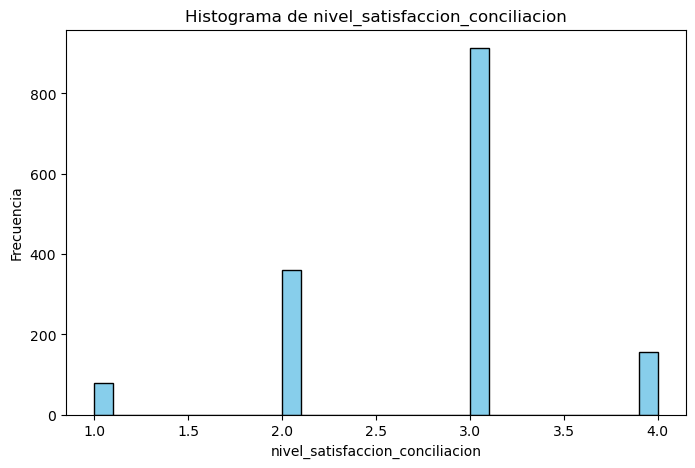

In [225]:
# Mostramos la distribución de los datos en las columnas numéricas.

# Creación gráficas para datos
import matplotlib.pyplot as plt
# Lista de columnas para las que quieres hacer histogramas

# Crear un histograma separado para cada columna
for col in list(columnas_number_con_nulos):
    plt.figure(figsize=(8, 5))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [226]:
# Imputamos nulos con la moda

columnas_moda = ["evaluacion_desempeño", "nivel_satisfaccion_conciliacion"]
for columna in columnas_moda:
    moda = df[columna].mode()[0]    
    df[columna] = df[columna].fillna(moda)

df[columnas_moda].isnull().sum()

evaluacion_desempeño               0
nivel_satisfaccion_conciliacion    0
dtype: int64

In [227]:
# Imputamos nulos con cero:
lista = ["tarifa_hora", "tarifa_diaria", "numero_empleado"]

for i in lista: 
    df[i] = df[i].fillna(0)
    df[i].isnull().sum()

In [228]:
# Quedan estas 2 columnas con nulos por imputar:
df[["años_en_activo", "ingreso_mensual"]]

,años_en_activo,ingreso_mensual
0,NaN,19537.0
1,34.0,19999.0
2,22.0,19232.0
3,NaN,17169.0
4,NaN,NaN
5,NaN,17174.0
6,28.0,NaN
7,20.0,NaN
8,22.0,16595.0
9,21.0,NaN


In [229]:
# Usando KNN Imputer: imputamos nulos de la columna años_en_activo

imputer_knn = KNNImputer(n_neighbors = 10)  
imputed_values = imputer_knn.fit_transform(df[['años_en_activo']])  
df['años_en_activo'] = df['años_en_activo'].mask(df['años_en_activo'].isna(), imputed_values)

Hemos probado a usar Iterative Imputer pero no nos ha convencido el resultado:

imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)  
imputed_values_2 = imputer_iterative.fit_transform(df[['ingreso_mensual']])  
df['ingreso_mensual'] = df['ingreso_mensual'].mask(df['ingreso_mensual'].isna(), imputed_values_2[:, 1])  

In [230]:
# Usando Simple Imputer: imputamos nulos de la columna ingreso_mensual.
# Imputamos los nulos con la mediana

imputer_contact_year = SimpleImputer(strategy = "median")
imputed_values = imputer_contact_year.fit_transform(df[["ingreso_mensual"]])
df['ingreso_mensual'] = imputed_values 

In [231]:
# Comprobamos que las imputaciones estén correctas: 
df[["años_en_activo", "ingreso_mensual"]]

,años_en_activo,ingreso_mensual
0,11.318934,19537.0
1,34.000000,19999.0
2,22.000000,19232.0
3,11.318934,17169.0
4,11.318934,4859.0
5,11.318934,17174.0
6,28.000000,4859.0
7,20.000000,4859.0
8,22.000000,16595.0
9,21.000000,4859.0


In [232]:
# Cambiamos el tipo de dato numérico según su contenido a int o float

df[['distancia_domicilio','numero_empleado', 'evaluacion_desempeño','nivel_satisfaccion_conciliacion','años_en_activo']] = df[['distancia_domicilio','numero_empleado', 'evaluacion_desempeño','nivel_satisfaccion_conciliacion','años_en_activo']].astype(int)
df[['tarifa_mensual','tarifa_hora','tarifa_diaria','ingreso_mensual']] = df[['tarifa_mensual','tarifa_hora','tarifa_diaria','ingreso_mensual']].astype(float)


In [233]:
df.dtypes

numero_empleado                      int32
desvinculado                        object
genero                              object
edad                                 int64
año_nacimiento                       int64
estado_civil                        object
nivel_estudios                       int64
campo_estudios                      object
frecuencia_viaje                    object
distancia_domicilio                  int32
teletrabajo                         object
tipo_jornada                        object
formaciones_ultimo_año               int64
trabajos_anteriores                  int64
años_en_activo                       int32
antigüedad_empresa                   int64
años_ultimo_ascenso                  int64
años_mismo_responsable               int64
departamento                        object
categoria                            int64
puesto                              object
horas_extras                        object
evaluacion_desempeño                 int32
tarifa_hora

##### **Comprobamos que hemos quitado todos los nulos de todas las columnas:**

In [234]:
df.isnull().sum()

numero_empleado                    0
desvinculado                       0
genero                             0
edad                               0
año_nacimiento                     0
estado_civil                       0
nivel_estudios                     0
campo_estudios                     0
frecuencia_viaje                   0
distancia_domicilio                0
teletrabajo                        0
tipo_jornada                       0
formaciones_ultimo_año             0
trabajos_anteriores                0
años_en_activo                     0
antigüedad_empresa                 0
años_ultimo_ascenso                0
años_mismo_responsable             0
departamento                       0
categoria                          0
puesto                             0
horas_extras                       0
evaluacion_desempeño               0
tarifa_hora                        0
tarifa_diaria                      0
tarifa_mensual                     0
ingreso_mensual                    0
%

In [238]:
# Sobreescribimos el csv y lo guardamos como una nueva versión: 

df.to_csv("HR_RAW_v3.csv")

In [239]:
df.dtypes

numero_empleado                      int32
desvinculado                        object
genero                              object
edad                                 int64
año_nacimiento                       int64
estado_civil                        object
nivel_estudios                       int64
campo_estudios                      object
frecuencia_viaje                    object
distancia_domicilio                  int32
teletrabajo                         object
tipo_jornada                        object
formaciones_ultimo_año               int64
trabajos_anteriores                  int64
años_en_activo                       int32
antigüedad_empresa                   int64
años_ultimo_ascenso                  int64
años_mismo_responsable               int64
departamento                        object
categoria                            int64
puesto                              object
horas_extras                        object
evaluacion_desempeño                 int32
tarifa_hora